In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import matplotlib.dates as mdates

## Apple Airpods Pro

In [3]:
df_airpods_review = pd.read_csv('data/AirPods Pro.csv')

In [4]:
df_airpods_review.head()

,Manufacturer,ProductName,review_site,language_country,review_rating,verified_purchase,review_date,review_title,review_text,product_url
0,Apple,AirPods Pro,Amazon,en-US,5,0,2019-10-30,Airpods Pro deliver😎,This airpods pro do exactly what apple said th...,https://www.amazon.com/product-reviews/B07ZPC9...
1,Apple,AirPods Pro,Amazon,en-US,4,0,2019-10-30,List of Features/Changes compared to Airpods (v2),"Like iphone 11 Pro, Macbook Pro, Airpad Pro; t...",https://www.amazon.com/product-reviews/B07ZPC9...
2,Apple,AirPods Pro,Amazon,en-US,3,0,2019-10-30,Cool but expensive,First review yeh heard about these excited but...,https://www.amazon.com/product-reviews/B07ZPC9...
3,Apple,AirPods Pro,Amazon,en-US,5,0,2019-10-30,Lit,They fire,https://www.amazon.com/product-reviews/B07ZPC9...
4,Apple,AirPods Pro,Amazon,en-US,5,1,2019-10-31,Saved my marriage,"With the new transparency mode, I can listen t...",https://www.amazon.com/product-reviews/B07ZPC9...


In [5]:
df_airpods_review['review_date'].min(), df_airpods_review['review_date'].max()

('2019-10-30', '2020-05-02')

In [8]:
df_airpods_review['review_date_key'] = pd.to_datetime(df_airpods_review['review_date']) - pd.to_timedelta(1, unit='d')

In [13]:
df_airpods_review.groupby(pd.Grouper(key='review_date_key', freq='W', label='left'))['review_rating'].count()

review_date_key
2019-10-27     32
2019-11-03     59
2019-11-10     91
2019-11-17     98
2019-11-24     83
2019-12-01    113
2019-12-08    172
2019-12-15    127
2019-12-22    303
2019-12-29    303
2020-01-05    267
2020-01-12    229
2020-01-19    146
2020-01-26    217
2020-02-02    202
2020-02-09    181
2020-02-16    182
2020-02-23    197
2020-03-01    172
2020-03-08    146
2020-03-15    124
2020-03-22     67
2020-03-29    100
2020-04-05     99
2020-04-12    156
2020-04-19    161
2020-04-26    108
Freq: W-SUN, Name: review_rating, dtype: int64

In [12]:
df_airpods_review_weekly = df_airpods_review.groupby(pd.Grouper(key='review_date_key', freq='W', label='left'))['review_rating'].agg(['mean', 'count']).reset_index()

In [14]:
df_airpods_review_weekly.head()

,review_date_key,mean,count
0,2019-10-27,4.437500,32
1,2019-11-03,4.474576,59
2,2019-11-10,4.000000,91
3,2019-11-17,4.142857,98
4,2019-11-24,4.325301,83


In [15]:
df_airpods_review_weekly.rename(columns={'mean':'average_rating', 'count':'review_count'}, inplace=True)

In [16]:
df_airpods_gg = pd.read_excel('data/Google Trend.xlsx', sheet_name = 'AirPds Pro')

In [17]:
df_airpods_gg.head()

,Week,"""Apple Airpods Pro"": (United States)"
0,2019-01-06,0
1,2019-01-13,0
2,2019-01-20,0
3,2019-01-27,0
4,2019-02-03,0


In [18]:
df_airpods_gg['week_key'] = pd.to_datetime(df_airpods_gg['Week'])

In [19]:
df_airpods_gg.rename(columns = {'"Apple Airpods Pro": (United States)':'trend_index'}, inplace = True)

In [20]:
df_airpods_gg.head()

,Week,trend_index,week_key
0,2019-01-06,0,2019-01-06
1,2019-01-13,0,2019-01-13
2,2019-01-20,0,2019-01-20
3,2019-01-27,0,2019-01-27
4,2019-02-03,0,2019-02-03


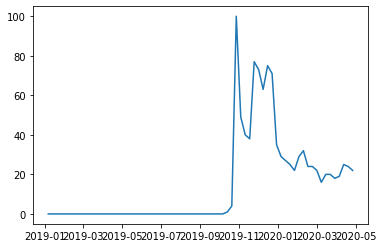

In [21]:
plt.plot(df_airpods_gg['week_key'], df_airpods_gg['trend_index'])

In [22]:
df_airpods_gg_filter = df_airpods_gg[df_airpods_gg['trend_index'].cumsum() > 0]

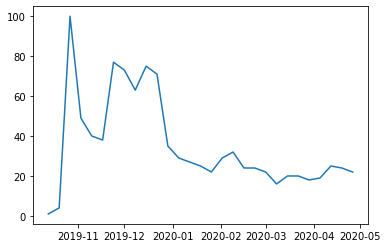

In [23]:
plt.plot(df_airpods_gg_filter['week_key'], df_airpods_gg_filter['trend_index'])

In [24]:
df_airpods = df_airpods_review_weekly.merge(df_airpods_gg_filter, left_on = 'review_date_key', right_on='week_key', how='right')

In [25]:
df_airpods.head()

,review_date_key,average_rating,review_count,Week,trend_index,week_key
0,2019-10-27,4.437500,32.0,2019-10-27,100,2019-10-27
1,2019-11-03,4.474576,59.0,2019-11-03,49,2019-11-03
2,2019-11-10,4.000000,91.0,2019-11-10,40,2019-11-10
3,2019-11-17,4.142857,98.0,2019-11-17,38,2019-11-17
4,2019-11-24,4.325301,83.0,2019-11-24,77,2019-11-24


In [46]:
df_airpods = df_airpods.sort_values('week_key').reset_index()

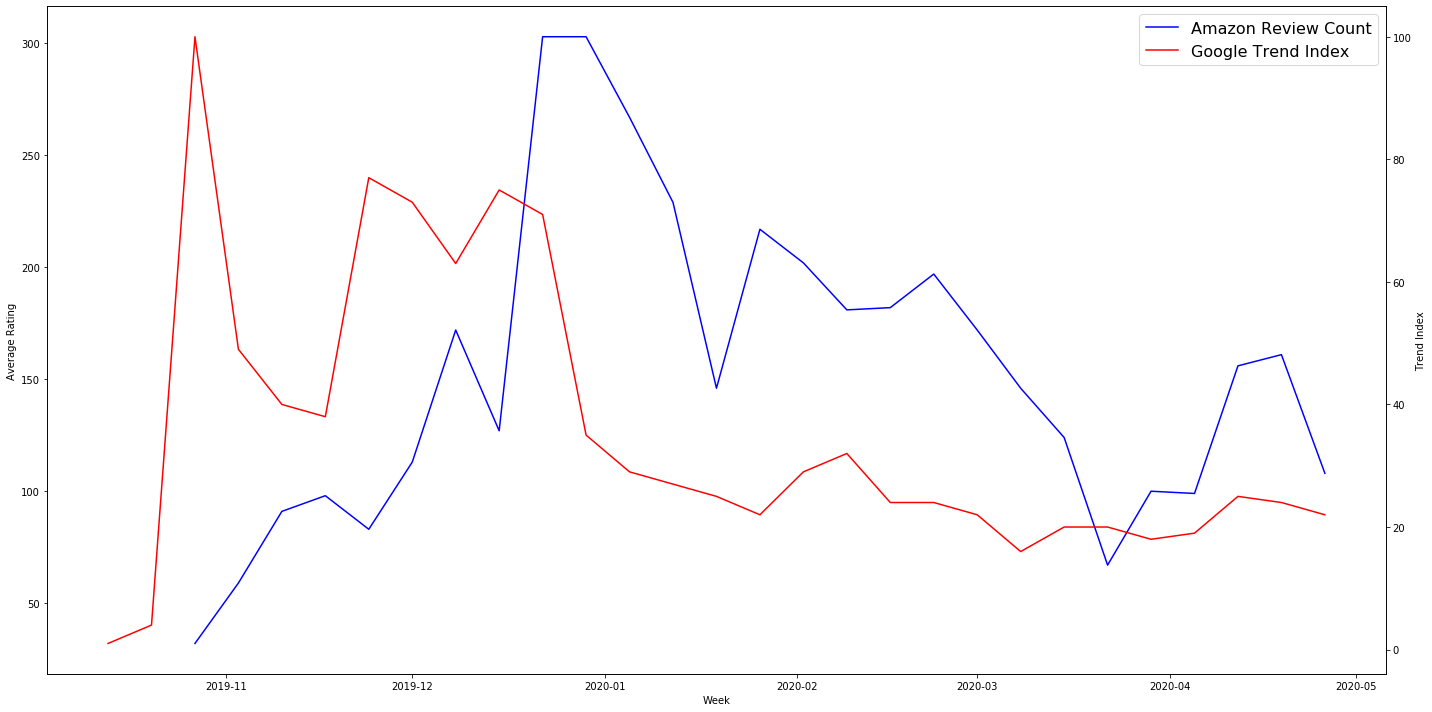

In [47]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

lns1 = ax.plot(df_airpods['week_key'], df_airpods['review_count'], '-b', label = 'Amazon Review Count')
ax2 = ax.twinx()
lns2 = ax2.plot(df_airpods['week_key'], df_airpods['trend_index'],'-r', label = 'Google Trend Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, fontsize=16)

ax.set_xlabel("Week")
ax.set_ylabel("Average Rating")
ax2.set_ylabel("Trend Index")

fig.tight_layout()
plt.show()

In [74]:
corr_lst = [(i, df_airpods['review_count'].corr(df_airpods['trend_index'].shift(i))) for i in range(len(df_airpods)//2)]

In [75]:
corr_lst

[(0, -0.20574212960072621),
 (1, 0.17063775378899088),
 (2, 0.40098291925519025),
 (3, 0.4394804808354893),
 (4, 0.46192258291059957),
 (5, 0.4645620612360123),
 (6, 0.48006970141196126),
 (7, 0.2882601798211645),
 (8, 0.5441074836594217),
 (9, 0.47556096581460916),
 (10, 0.1331614533682664),
 (11, -0.01689784182808948),
 (12, -0.1696168368700117),
 (13, 0.06174621439700044)]

In [76]:
sorted(corr_lst,key=lambda x: x[1], reverse=True)

[(8, 0.5441074836594217),
 (6, 0.48006970141196126),
 (9, 0.47556096581460916),
 (5, 0.4645620612360123),
 (4, 0.46192258291059957),
 (3, 0.4394804808354893),
 (2, 0.40098291925519025),
 (7, 0.2882601798211645),
 (1, 0.17063775378899088),
 (10, 0.1331614533682664),
 (13, 0.06174621439700044),
 (11, -0.01689784182808948),
 (12, -0.1696168368700117),
 (0, -0.20574212960072621)]

In [77]:
max(corr_lst,key=lambda item:item[1])

(8, 0.5441074836594217)

## Jabra Elite 75t

In [78]:
df_elite_review = pd.read_csv('data/Elite 75t.csv')

In [79]:
df_elite_review.head()

,Manufacturer,ProductName,review_site,language_country,review_rating,verified_purchase,review_date,review_title,review_text,product_url
0,Jabra,Elite 75t,Amazon,en-US,4,1,2020-03-07,Look good an they sound! GREAT!,"They sound very good, all the way around. The ...",https://www.amazon.com/product-reviews/B07X9VG...
1,Jabra,Elite 75t,Amazon,en-US,5,1,2020-01-08,Good wireless earbuds,Amazon sound easy to use and comfortable to wear,https://www.amazon.com/product-reviews/B07X9VG...
2,Jabra,Elite 75t,Amazon,en-US,5,0,2019-11-26,Recommended for audiophiles who love bass,I started out with the new Sony WF1000-XM3 ear...,https://www.amazon.com/product-reviews/B07X9VG...
3,Jabra,Elite 75t,Amazon,en-US,5,1,2020-02-22,!!! Love them !!,Love these worth the money,https://www.amazon.com/product-reviews/B07X9VG...
4,Jabra,Elite 75t,Amazon,en-US,1,1,2020-02-06,DON'T BUY NOT WORH HE MONEY,this product sucks,https://www.amazon.com/product-reviews/B07X9VG...


In [80]:
df_elite_review['review_date'].min(), df_elite_review['review_date'].max()

('2019-11-13', '2020-05-02')

In [81]:
df_elite_review['review_date_key'] = pd.to_datetime(df_elite_review['review_date']) - pd.to_timedelta(1, unit='d')

In [82]:
df_elite_review.groupby(pd.Grouper(key='review_date_key', freq='W', label='left'))['review_rating'].count()

review_date_key
2019-11-10     3
2019-11-17     4
2019-11-24     4
2019-12-01     6
2019-12-08    23
2019-12-15    14
2019-12-22    28
2019-12-29    21
2020-01-05    29
2020-01-12    37
2020-01-19    21
2020-01-26    32
2020-02-02    36
2020-02-09    22
2020-02-16    45
2020-02-23    27
2020-03-01    36
2020-03-08    20
2020-03-15    38
2020-03-22    16
2020-03-29    12
2020-04-05    21
2020-04-12    18
2020-04-19    19
2020-04-26    17
Freq: W-SUN, Name: review_rating, dtype: int64

In [83]:
df_elite_review_weekly = df_elite_review.groupby(pd.Grouper(key='review_date_key', freq='W', label='left'))['review_rating'].agg(['mean', 'count']).reset_index()

In [84]:
df_elite_review_weekly.head()

,review_date_key,mean,count
0,2019-11-10,4.000000,3
1,2019-11-17,3.000000,4
2,2019-11-24,3.750000,4
3,2019-12-01,4.000000,6
4,2019-12-08,3.130435,23


In [85]:
df_elite_review_weekly.rename(columns={'mean':'average_rating', 'count':'review_count'}, inplace=True)

In [86]:
df_elite_gg = pd.read_excel('data/Google Trend.xlsx', sheet_name = 'Elite 75t')

In [87]:
df_elite_gg.head()

,Week,"""Jabra Elite 75t"": (United States)"
0,2019-01-06,0
1,2019-01-13,0
2,2019-01-20,0
3,2019-01-27,0
4,2019-02-03,0


In [88]:
df_elite_gg['week_key'] = pd.to_datetime(df_elite_gg['Week'])

In [89]:
df_elite_gg.rename(columns = {'"Jabra Elite 75t": (United States)':'trend_index'}, inplace = True)

In [90]:
df_elite_gg.head()

,Week,trend_index,week_key
0,2019-01-06,0,2019-01-06
1,2019-01-13,0,2019-01-13
2,2019-01-20,0,2019-01-20
3,2019-01-27,0,2019-01-27
4,2019-02-03,0,2019-02-03


In [92]:
df_elite_gg_filter = df_elite_gg[df_elite_gg['trend_index'].cumsum() > 0]

In [94]:
df_elite = df_elite_review_weekly.merge(df_elite_gg_filter, left_on = 'review_date_key', right_on='week_key', how='right')

In [95]:
df_elite.head()

,review_date_key,average_rating,review_count,Week,trend_index,week_key
0,2019-11-10,4.000000,3.0,2019-11-10,30,2019-11-10
1,2019-11-17,3.000000,4.0,2019-11-17,44,2019-11-17
2,2019-11-24,3.750000,4.0,2019-11-24,79,2019-11-24
3,2019-12-01,4.000000,6.0,2019-12-01,63,2019-12-01
4,2019-12-08,3.130435,23.0,2019-12-08,31,2019-12-08


In [96]:
df_elite = df_elite.sort_values('week_key').reset_index()

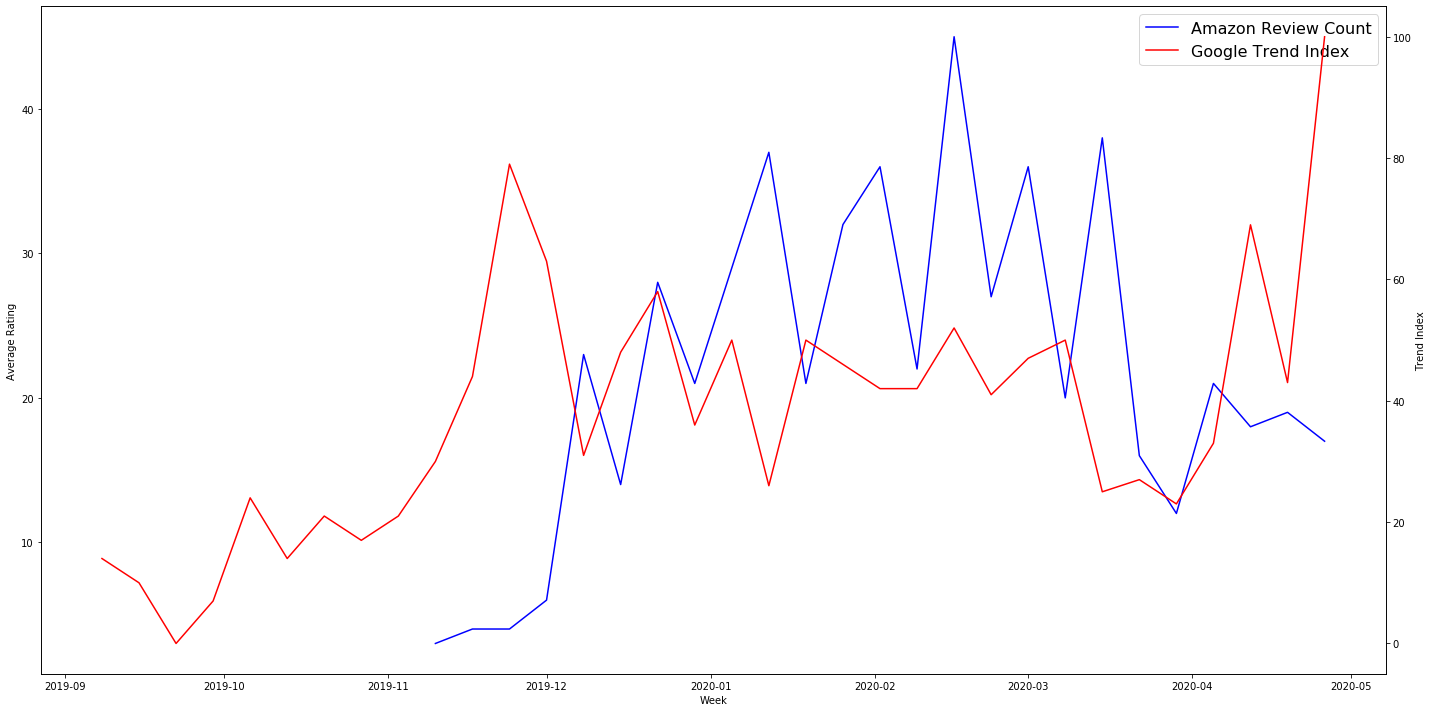

In [97]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

lns1 = ax.plot(df_elite['week_key'], df_elite['review_count'], '-b', label = 'Amazon Review Count')
ax2 = ax.twinx()
lns2 = ax2.plot(df_elite['week_key'], df_elite['trend_index'],'-r', label = 'Google Trend Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, fontsize=16)

ax.set_xlabel("Week")
ax.set_ylabel("Average Rating")
ax2.set_ylabel("Trend Index")

fig.tight_layout()
plt.show()

In [106]:
corr_lst_elit = [(i, df_elite['review_count'].corr(df_elite['trend_index'].shift(i))) for i in range(len(df_elite)//2)]

In [107]:
corr_lst_elit

[(0, -0.20884344336335556),
 (1, 0.18062990059439166),
 (2, 0.265490835584826),
 (3, 0.37274723002865723),
 (4, 0.5622954421849382),
 (5, 0.3450265208167892),
 (6, 0.6296403120312011),
 (7, 0.4854630610559548),
 (8, 0.5331080710911782),
 (9, 0.4914788755865265),
 (10, 0.40583438521878756),
 (11, 0.29867618280269925),
 (12, 0.2774278890875602),
 (13, 0.05496081347099955),
 (14, -0.1289451487839146),
 (15, -0.2509202574910126),
 (16, -0.28737241027933724)]

In [108]:
sorted(corr_lst_elit,key=lambda x: x[1], reverse=True)

[(6, 0.6296403120312011),
 (4, 0.5622954421849382),
 (8, 0.5331080710911782),
 (9, 0.4914788755865265),
 (7, 0.4854630610559548),
 (10, 0.40583438521878756),
 (3, 0.37274723002865723),
 (5, 0.3450265208167892),
 (11, 0.29867618280269925),
 (12, 0.2774278890875602),
 (2, 0.265490835584826),
 (1, 0.18062990059439166),
 (13, 0.05496081347099955),
 (14, -0.1289451487839146),
 (0, -0.20884344336335556),
 (15, -0.2509202574910126),
 (16, -0.28737241027933724)]

In [109]:
max(corr_lst_elit,key=lambda item:item[1])

(6, 0.6296403120312011)

<BarContainer object of 17 artists>

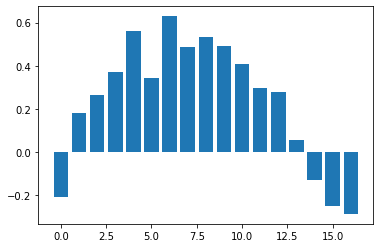

In [110]:
plt.bar([i[0] for i in corr_lst_elit], [i[1] for i in corr_lst_elit])

## Earfun Free

In [175]:
df_free_review = pd.read_csv('data/Free.csv')

In [176]:
df_free_review.head()

,Manufacturer,ProductName,review_site,language_country,review_rating,verified_purchase,review_date,review_title,review_text,product_url
0,EarFun,Free,Amazon,en-US,5,1,2019-07-01,amazing sound quality!,Sound quality is awesome! This buds have an am...,https://www.amazon.com/product-reviews/B07R5MK...
1,EarFun,Free,Amazon,en-US,5,1,2019-07-02,Found the one,"Love the usb-c, fit (quite impressed, coming f...",https://www.amazon.com/product-reviews/B07R5MK...
2,EarFun,Free,Amazon,en-US,5,1,2019-07-04,Excellent wireless earbuds,Packaged well and in a little charging and sto...,https://www.amazon.com/product-reviews/B07R5MK...
3,EarFun,Free,Amazon,en-US,5,1,2019-07-04,Great for people who need a good fit and great...,I just received these buds yesterday and am ve...,https://www.amazon.com/product-reviews/B07R5MK...
4,EarFun,Free,Amazon,en-US,4,1,2019-07-05,Very lightweight and comfortable.,"These are amazing for music, even better than ...",https://www.amazon.com/product-reviews/B07R5MK...


In [177]:
df_free_review['review_date'].min(), df_free_review['review_date'].max()

('2019-07-01', '2020-05-02')

In [178]:
df_free_review['review_date_key'] = pd.to_datetime(df_free_review['review_date'])

In [179]:
df_free_review.groupby(pd.Grouper(key='review_date_key', freq='W-SAT',label='left'))['review_rating'].count()

review_date_key
2019-06-29     8
2019-07-06     1
2019-07-13     3
2019-07-20     3
2019-07-27     9
2019-08-03     6
2019-08-10    12
2019-08-17     7
2019-08-24     7
2019-08-31    12
2019-09-07     6
2019-09-14     7
2019-09-21    12
2019-09-28    15
2019-10-05    20
2019-10-12    13
2019-10-19    30
2019-10-26    51
2019-11-02    32
2019-11-09    46
2019-11-16    38
2019-11-23    29
2019-11-30    29
2019-12-07    53
2019-12-14    61
2019-12-21    65
2019-12-28    77
2020-01-04    91
2020-01-11    88
2020-01-18    73
2020-01-25    69
2020-02-01    66
2020-02-08    68
2020-02-15    62
2020-02-22    77
2020-02-29    59
2020-03-07    83
2020-03-14    45
2020-03-21    59
2020-03-28    46
2020-04-04    77
2020-04-11    82
2020-04-18    90
2020-04-25    97
Freq: W-SAT, Name: review_rating, dtype: int64

In [180]:
df_free_review_weekly = df_free_review.groupby(pd.Grouper(key='review_date_key', freq='W-SAT'))['review_rating'].agg(['mean', 'count']).reset_index()

In [181]:
df_free_review_weekly['review_date_key'] = df_free_review_weekly['review_date_key'] + pd.to_timedelta(1, unit='d')

In [182]:
df_free_review_weekly.head()

,review_date_key,mean,count
0,2019-07-07,4.750000,8
1,2019-07-14,5.000000,1
2,2019-07-21,5.000000,3
3,2019-07-28,5.000000,3
4,2019-08-04,4.777778,9


In [183]:
df_free_review_weekly.rename(columns={'mean':'average_rating', 'count':'review_count'}, inplace=True)

In [184]:
df_free_gg = pd.read_excel('data/Google Trend.xlsx', sheet_name = 'Free')

In [185]:
df_free_gg.head()

,Week,"""EarFun Free"": (United States)"
0,2019-01-06,0
1,2019-01-13,0
2,2019-01-20,0
3,2019-01-27,0
4,2019-02-03,0


In [186]:
df_free_gg['week_key'] = pd.to_datetime(df_free_gg['Week'])

In [187]:
df_free_gg.rename(columns = {'"EarFun Free": (United States)':'trend_index'}, inplace = True)

In [188]:
df_free_gg.head()

,Week,trend_index,week_key
0,2019-01-06,0,2019-01-06
1,2019-01-13,0,2019-01-13
2,2019-01-20,0,2019-01-20
3,2019-01-27,0,2019-01-27
4,2019-02-03,0,2019-02-03


In [189]:
df_free_gg_filter = df_free_gg[df_free_gg['trend_index'].cumsum() > 0]

In [190]:
df_free = df_free_review_weekly.merge(df_free_gg_filter, left_on = 'review_date_key', right_on='week_key', how='right')

In [191]:
df_free.head()

,review_date_key,average_rating,review_count,Week,trend_index,week_key
0,2019-07-07,4.750000,8.0,2019-07-07,0,2019-07-07
1,2019-07-14,5.000000,1.0,2019-07-14,50,2019-07-14
2,2019-07-21,5.000000,3.0,2019-07-21,50,2019-07-21
3,2019-07-28,5.000000,3.0,2019-07-28,0,2019-07-28
4,2019-08-04,4.777778,9.0,2019-08-04,50,2019-08-04


In [192]:
df_free = df_free.sort_values('week_key').reset_index()

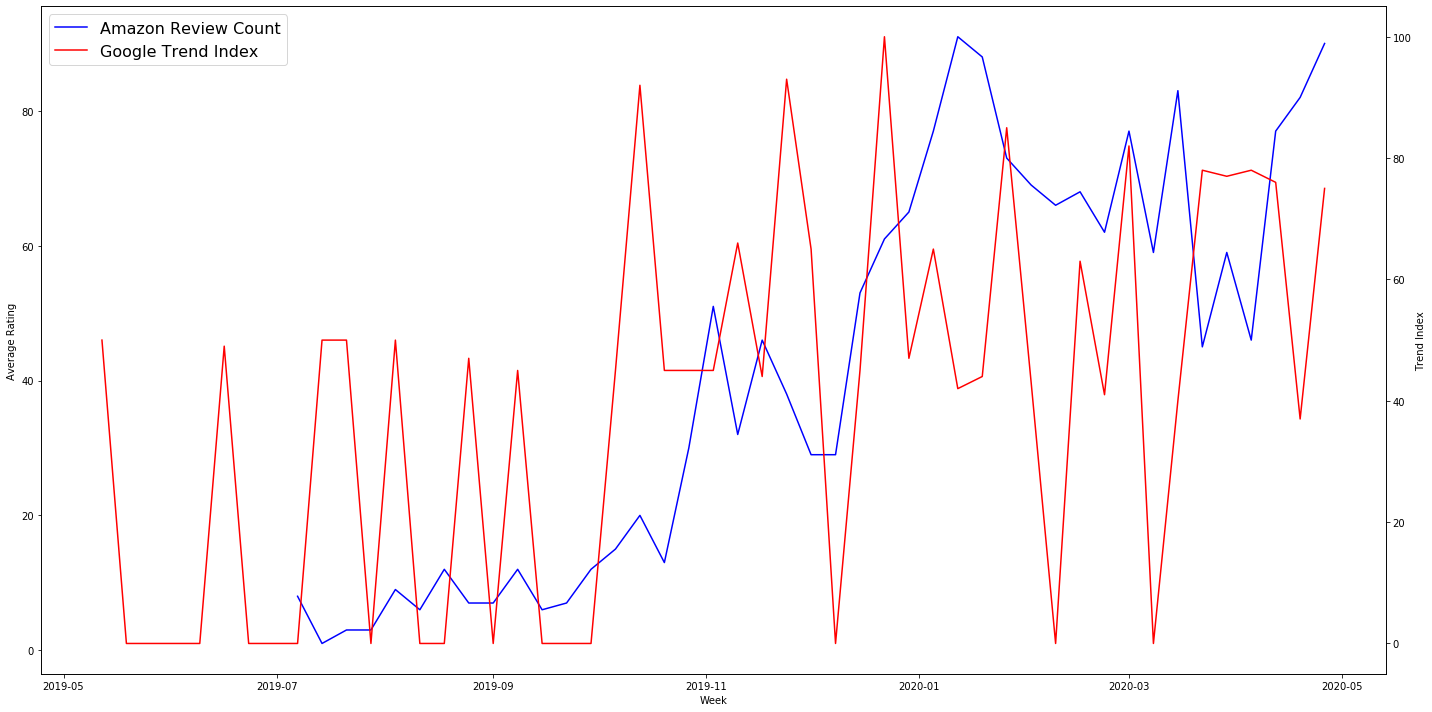

In [193]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

lns1 = ax.plot(df_free['week_key'], df_free['review_count'], '-b', label = 'Amazon Review Count')
ax2 = ax.twinx()
lns2 = ax2.plot(df_free['week_key'], df_free['trend_index'],'-r', label = 'Google Trend Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, fontsize=16)

ax.set_xlabel("Week")
ax.set_ylabel("Average Rating")
ax2.set_ylabel("Trend Index")

fig.tight_layout()
plt.show()

In [194]:
corr_lst_free = [(i, df_free['review_count'].corr(df_free['trend_index'].shift(i))) for i in range(len(df_free)//2)]

In [195]:
corr_lst_free

[(0, 0.4159574673239057),
 (1, 0.350345157460447),
 (2, 0.5360128442874218),
 (3, 0.5144594977790118),
 (4, 0.5170696246589089),
 (5, 0.4185803136887373),
 (6, 0.4419148499236796),
 (7, 0.48945717037853703),
 (8, 0.536483924390578),
 (9, 0.4724303046125843),
 (10, 0.5413856186575631),
 (11, 0.4289882251521273),
 (12, 0.5491066285819569),
 (13, 0.48328056111468953),
 (14, 0.4071266073246014),
 (15, 0.41028316330550685),
 (16, 0.4228565669031787),
 (17, 0.3122324641418604),
 (18, 0.26657967371333946),
 (19, 0.14484212864694918),
 (20, 0.22311862551681294),
 (21, 0.2177366698269613),
 (22, 0.3297390207179676),
 (23, 0.14361833690948209),
 (24, 0.10895497610204084)]

In [196]:
sorted(corr_lst_free,key=lambda x: x[1], reverse=True)

[(12, 0.5491066285819569),
 (10, 0.5413856186575631),
 (8, 0.536483924390578),
 (2, 0.5360128442874218),
 (4, 0.5170696246589089),
 (3, 0.5144594977790118),
 (7, 0.48945717037853703),
 (13, 0.48328056111468953),
 (9, 0.4724303046125843),
 (6, 0.4419148499236796),
 (11, 0.4289882251521273),
 (16, 0.4228565669031787),
 (5, 0.4185803136887373),
 (0, 0.4159574673239057),
 (15, 0.41028316330550685),
 (14, 0.4071266073246014),
 (1, 0.350345157460447),
 (22, 0.3297390207179676),
 (17, 0.3122324641418604),
 (18, 0.26657967371333946),
 (20, 0.22311862551681294),
 (21, 0.2177366698269613),
 (19, 0.14484212864694918),
 (23, 0.14361833690948209),
 (24, 0.10895497610204084)]

In [197]:
max(corr_lst_free,key=lambda item:item[1])

(12, 0.5491066285819569)

<BarContainer object of 25 artists>

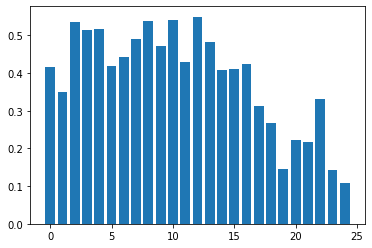

In [198]:
plt.bar([i[0] for i in corr_lst_free], [i[1] for i in corr_lst_free])

## Modularize

In [203]:
def review_date_import_clean(product_name):
    df_review = pd.read_csv('data/{}.csv'.format(product_name))
    df_review['review_date_key'] = pd.to_datetime(df_review['review_date'])
    df_review_weekly = df_review.groupby(pd.Grouper(key='review_date_key', freq='W-SAT', label='left'))['review_rating']\
                        .agg(['mean', 'count'])\
                        .reset_index()
    df_review_weekly['review_date_key'] = df_review_weekly['review_date_key'] + pd.to_timedelta(1, unit='d')
    df_review_weekly.rename(columns={'mean':'average_rating', 'count':'review_count'}, inplace=True)
    
    return df_review_weekly

In [211]:
def google_data_import_clean(product_name):
    df_gg = pd.read_excel('data/Google Trend.xlsx', sheet_name = product_name)
    df_gg['week_key'] = pd.to_datetime(df_gg['Week'])
    
    df_gg.rename(columns = {df_gg.columns[1]:'trend_index'}, inplace = True)
    df_gg_filter = df_gg[df_gg['trend_index'].cumsum() > 0]
    
    return df_gg_filter

In [220]:
def data_import_clean(product_name):
    
    df_review_clean = review_date_import_clean(product_name)
    df_gg_clean = google_data_import_clean(product_name)
    
    df = df_review_clean.merge(df_gg_clean, left_on = 'review_date_key', right_on='week_key', how='right')
    df = df.sort_values('week_key').reset_index().drop('index', axis=1)
    
    return df

In [222]:
def visualize_review_google_trend(df):
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)

    lns1 = ax.plot(df['week_key'], df['review_count'], '-b', label = 'Amazon Review Count')
    ax2 = ax.twinx()
    lns2 = ax2.plot(df['week_key'], df['trend_index'],'-r', label = 'Google Trend Index')

    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0, fontsize=16)

    ax.set_xlabel("Week")
    ax.set_ylabel("Average Rating")
    ax2.set_ylabel("Trend Index")

    fig.tight_layout()
    plt.show()

In [246]:
def visualize_correlation(df):
    corr_lst = [(i, df['review_count'].corr(df['trend_index'].shift(i))) for i in range(len(df)//2)]
    plt.bar([i[0] for i in corr_lst], [i[1] for i in corr_lst])
    print(max(corr_lst,key=lambda item:item[1]))

### Apple Airpods Pro

In [228]:
df_airpods = data_import_clean('AirPods Pro')

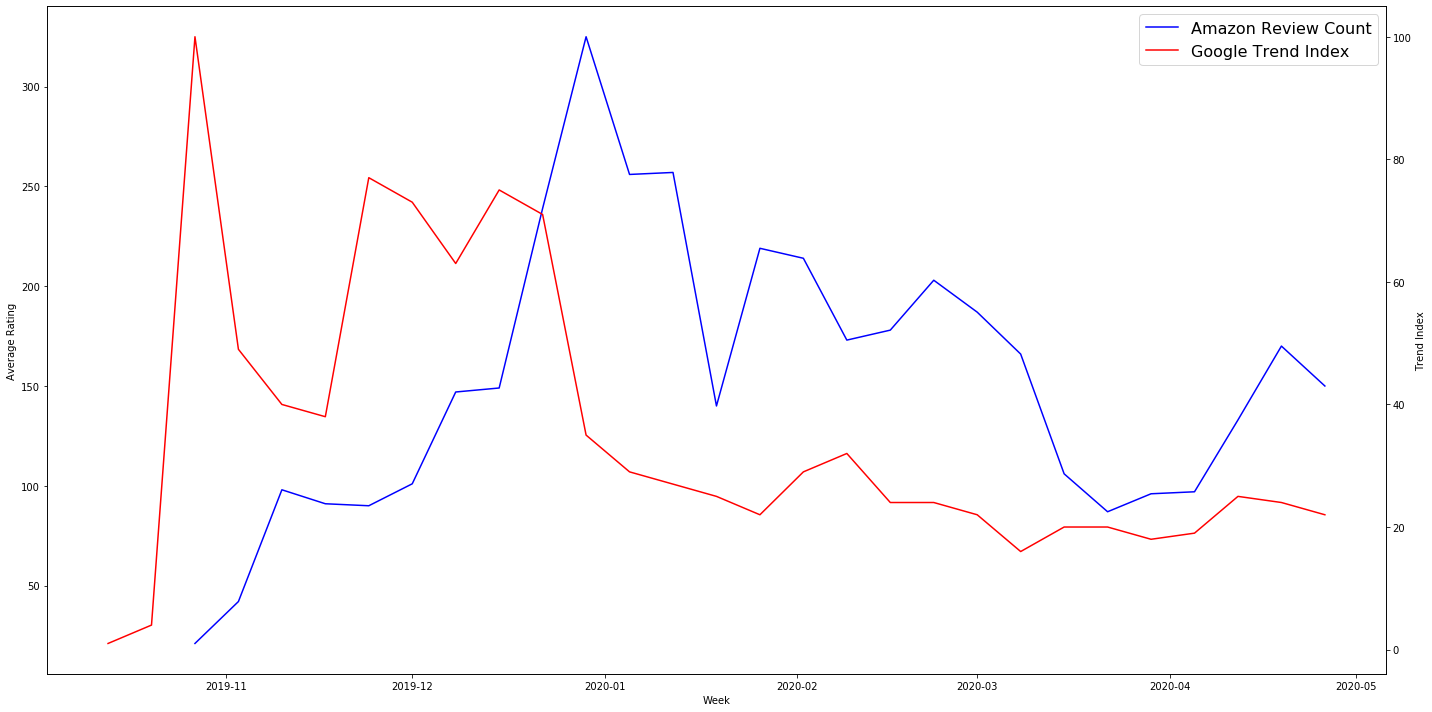

In [229]:
visualize_review_google_trend(df_airpods)

(9, 0.5667539019109762)


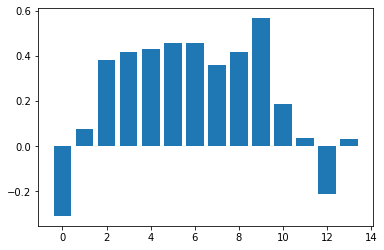

In [247]:
visualize_correlation(df_airpods)

### Jabra Elite 75t

In [232]:
df_elite = data_import_clean('Elite 75t')

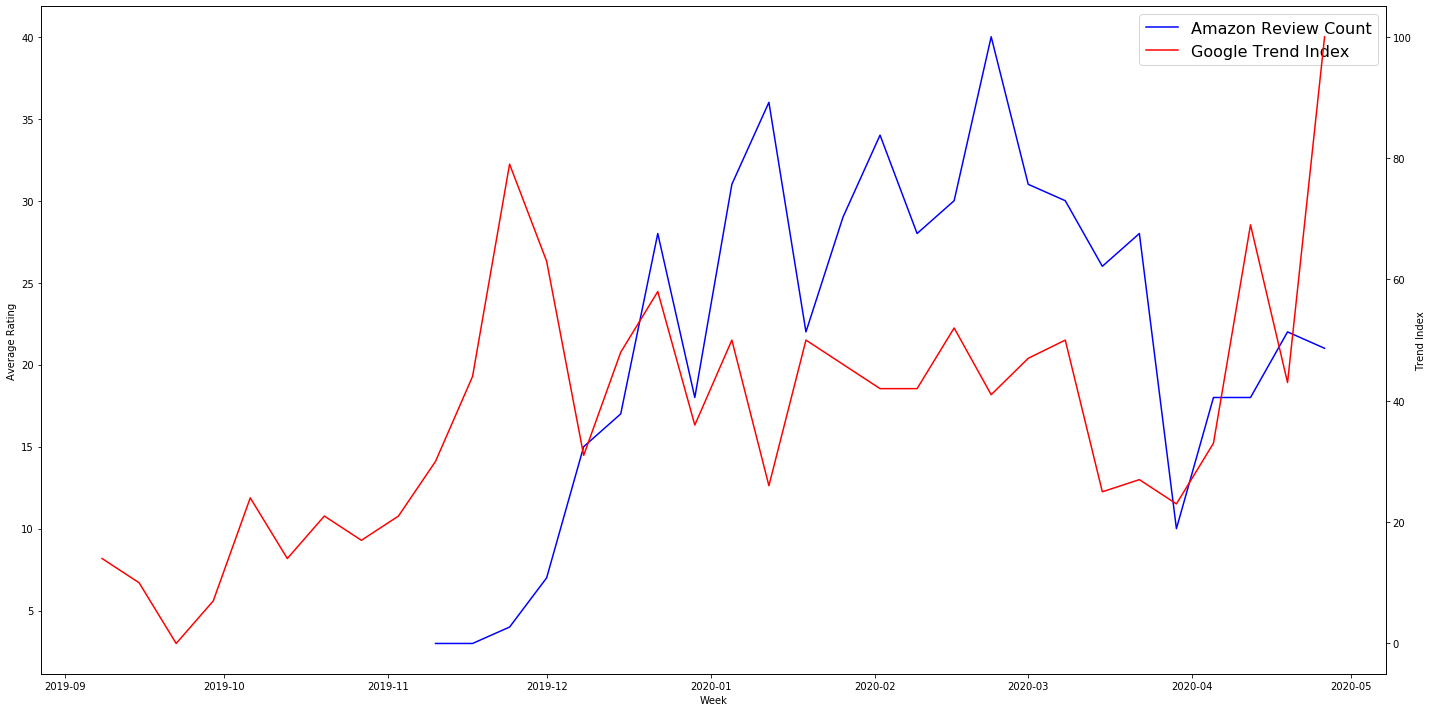

In [233]:
visualize_review_google_trend(df_elite)

(7, 0.6478657447464897)


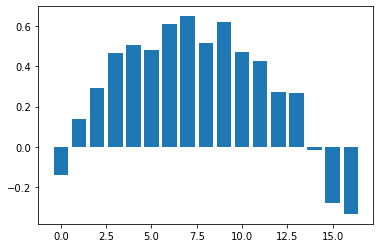

In [248]:
visualize_correlation(df_elite)

### EarFun Free

In [235]:
df_free = data_import_clean('Free')

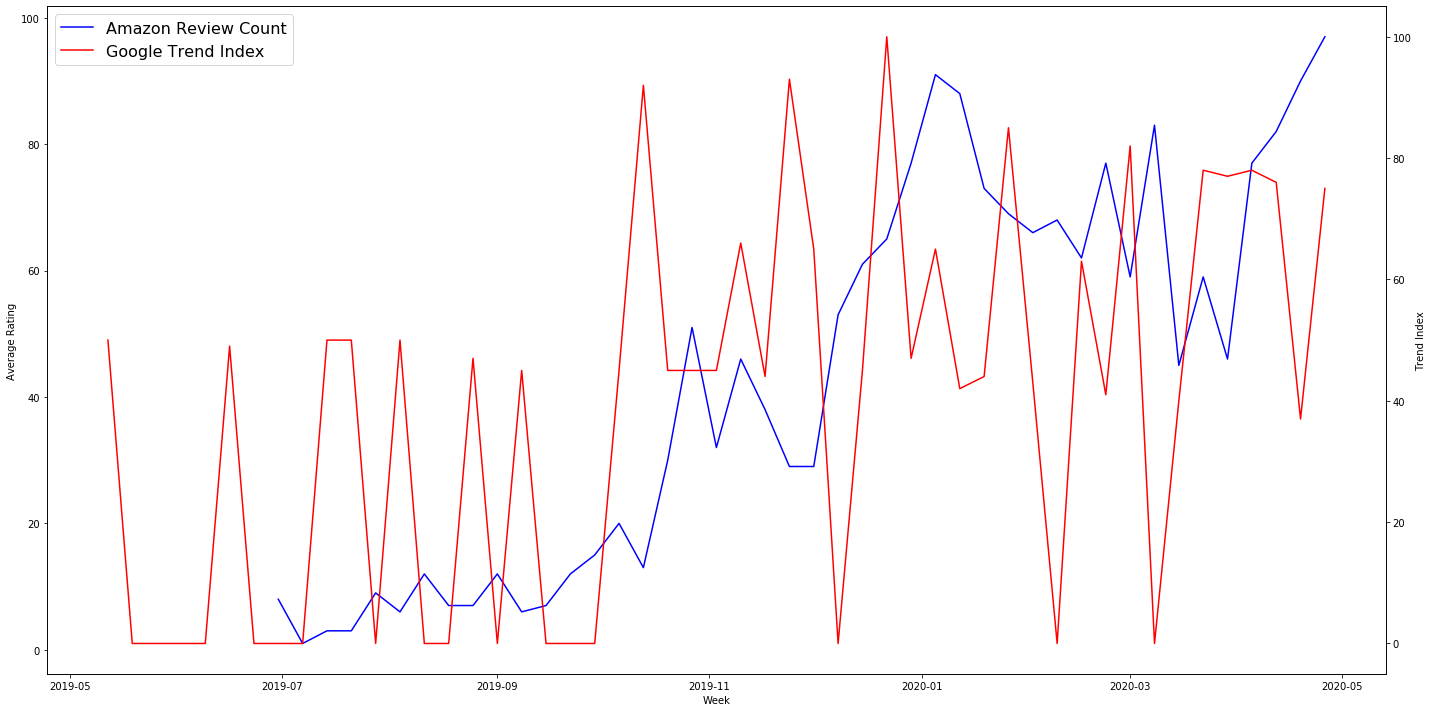

In [236]:
visualize_review_google_trend(df_free)

(3, 0.5394989968435239)


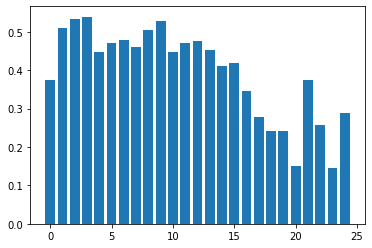

In [249]:
visualize_correlation(df_free)

### Samsung Galaxy Buds Plus

In [238]:
df_galaxy = data_import_clean('Galaxy Buds Plus')

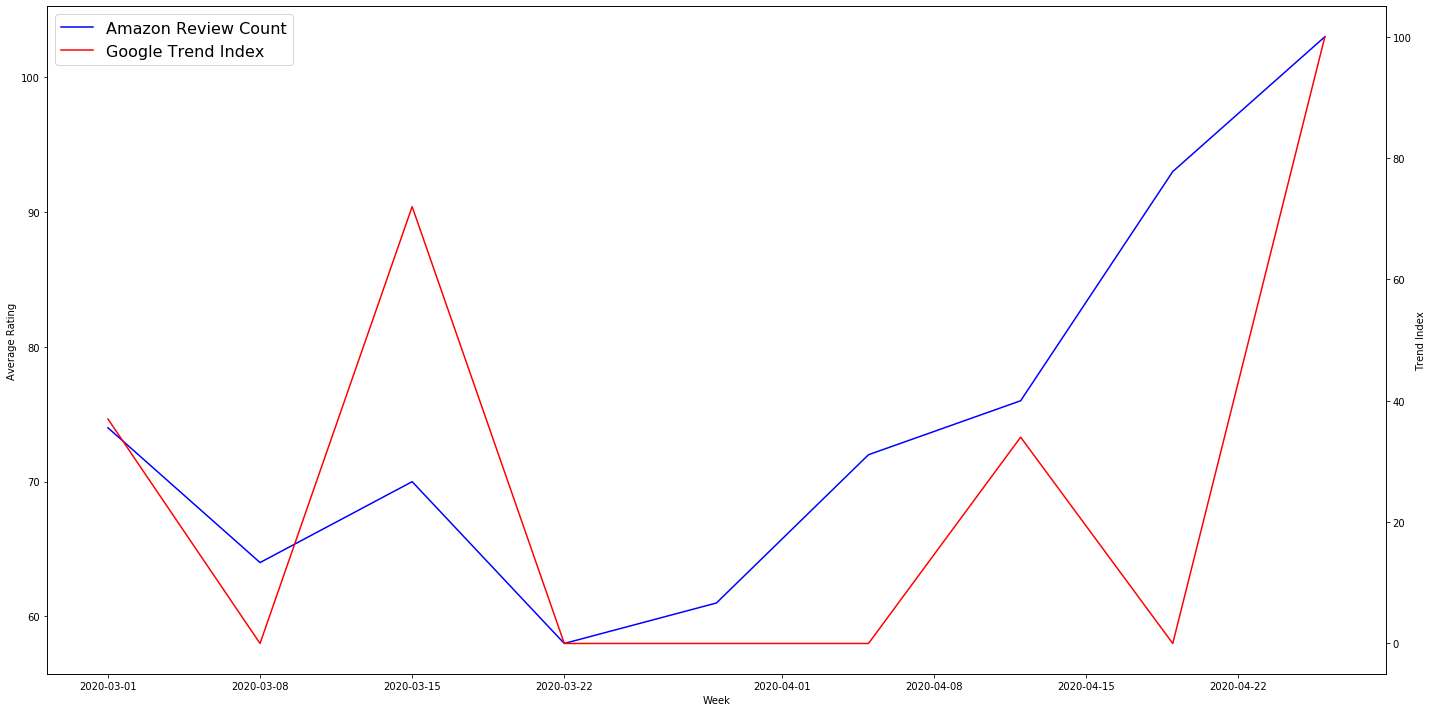

In [239]:
visualize_review_google_trend(df_galaxy)

(0, 0.5764889515872809)


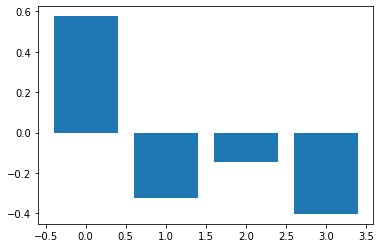

In [250]:
visualize_correlation(df_galaxy)

### Bose Noise Cancelling Headphones 700

In [257]:
df_nc = data_import_clean('NC700')

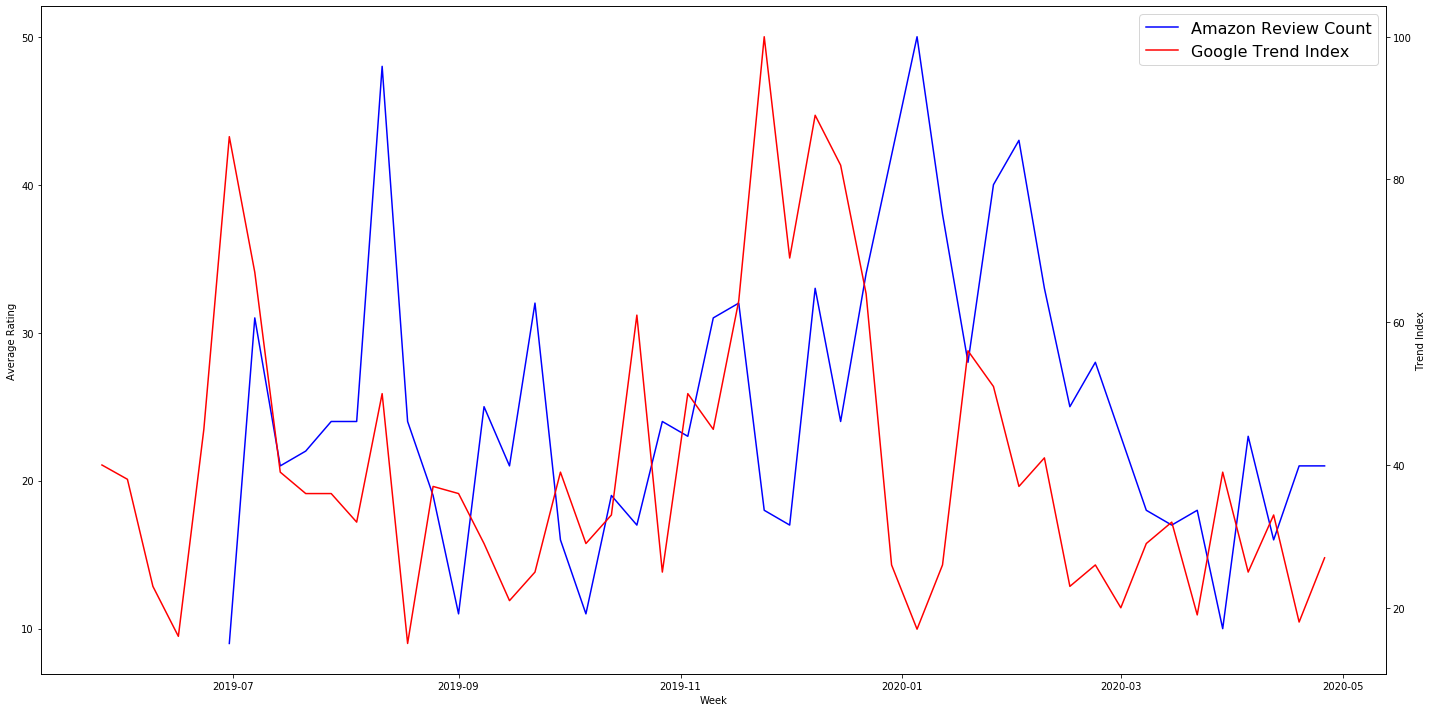

In [258]:
visualize_review_google_trend(df_nc)

(6, 0.6166775301276933)


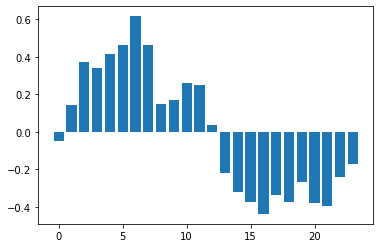

In [259]:
visualize_correlation(df_nc)

### Anker Soundcore Liberty 2 Pro

In [260]:
df_liberty_pro= data_import_clean('Soundcore Liberty 2 Pro')

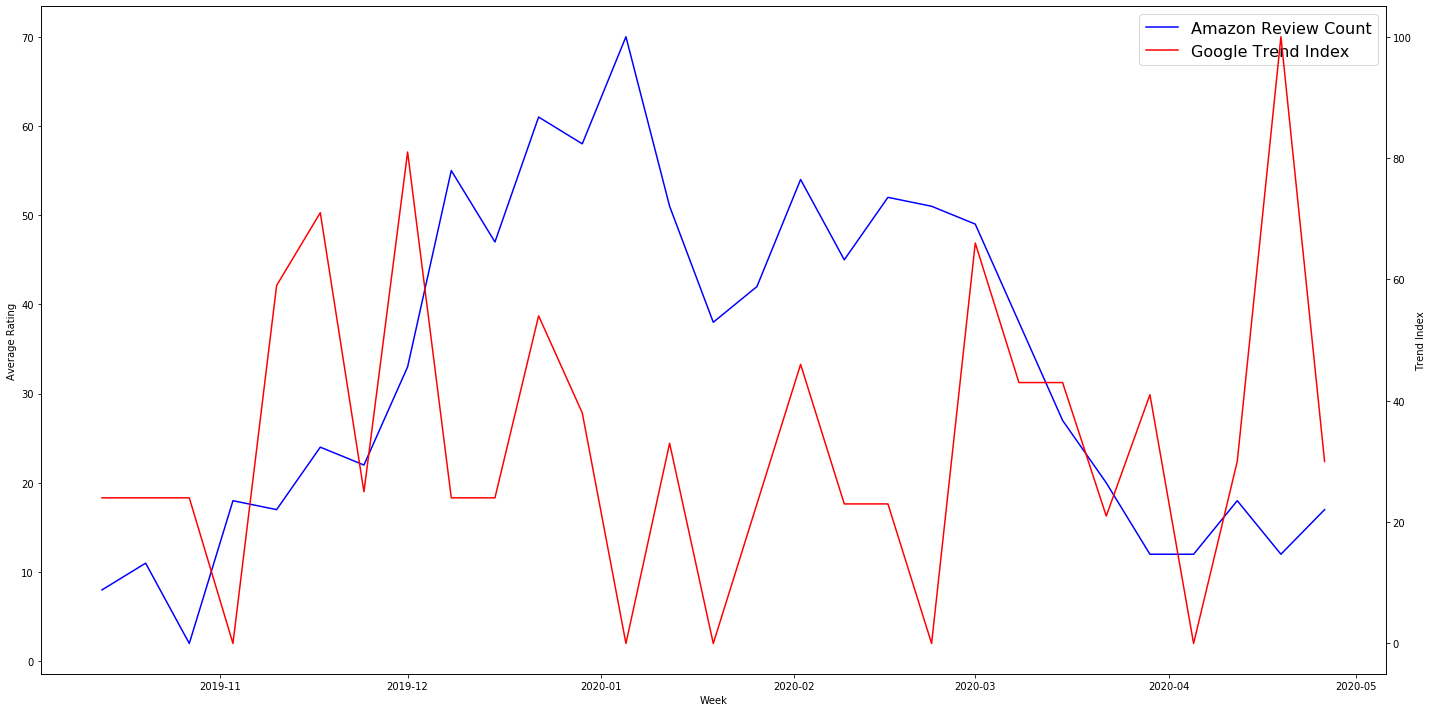

In [261]:
visualize_review_google_trend(df_liberty_pro)

(13, 0.317653302538346)


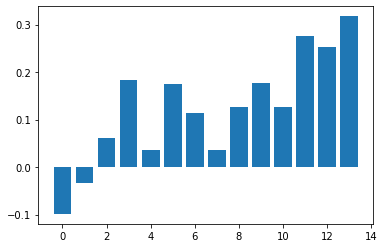

In [262]:
visualize_correlation(df_liberty_pro)

### Anker Soundcore Liberty Air 2

In [263]:
df_liberty_air= data_import_clean('Soundcore Liberty Air 2')

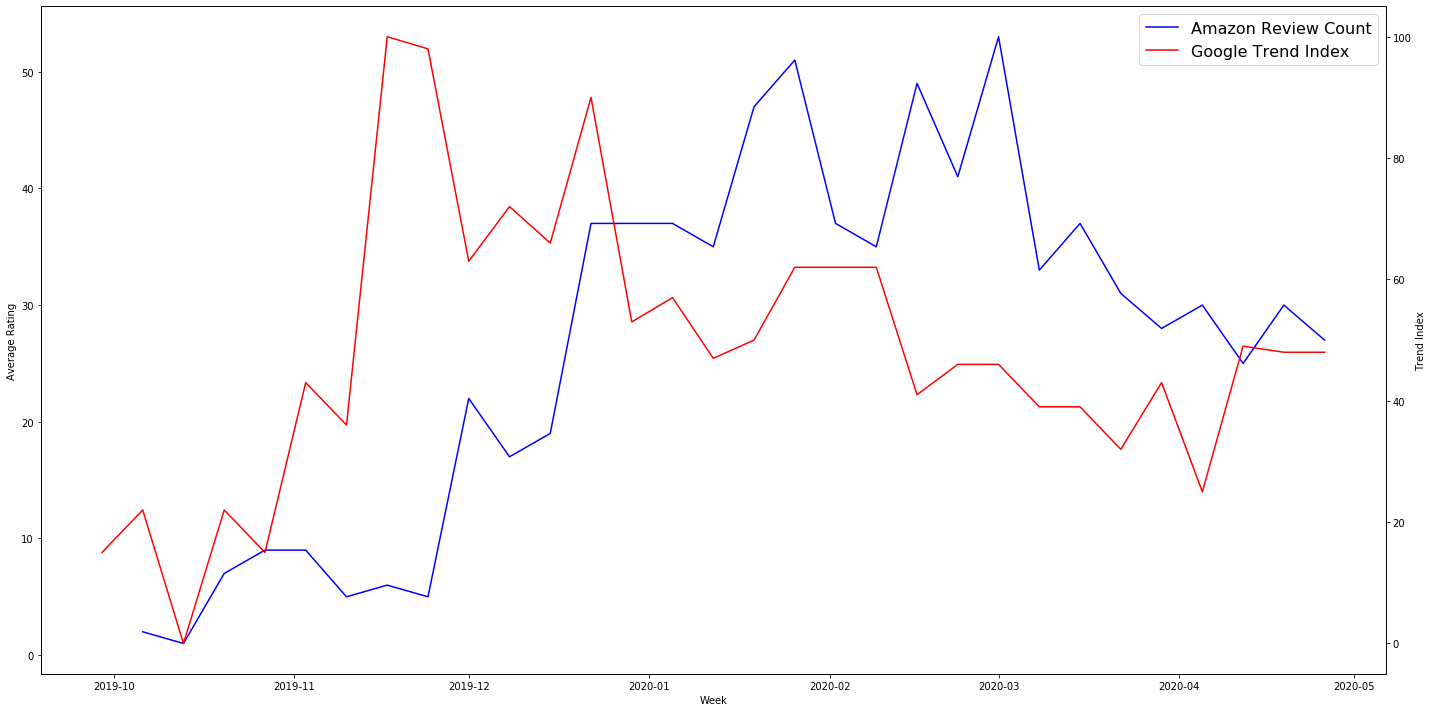

In [264]:
visualize_review_google_trend(df_liberty_air)

(5, 0.7517550715644838)


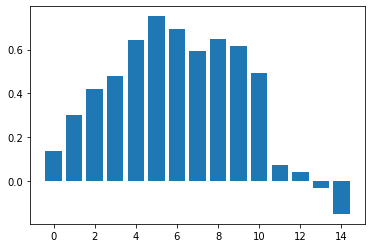

In [265]:
visualize_correlation(df_liberty_air)

### Anker Soundcore Life Q20

In [267]:
df_life= data_import_clean('Soundcore Life Q20')

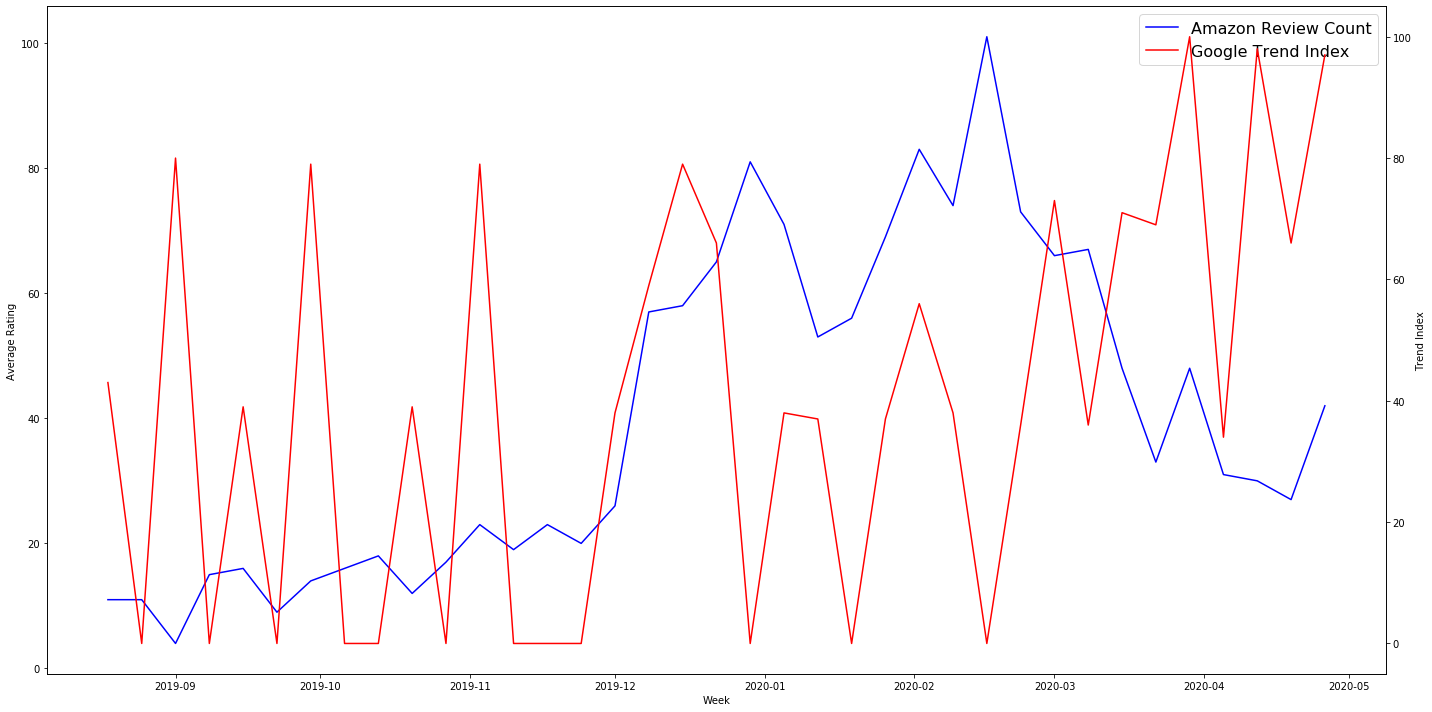

In [268]:
visualize_review_google_trend(df_life)

(8, 0.16134764217834946)


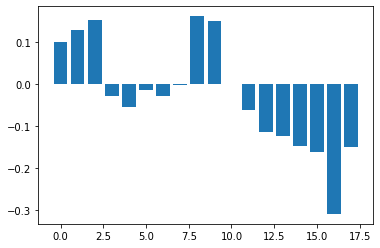

In [269]:
visualize_correlation(df_life)

### Sony WF-1000XM3

In [271]:
df_wf= data_import_clean('WF-1000XM3')

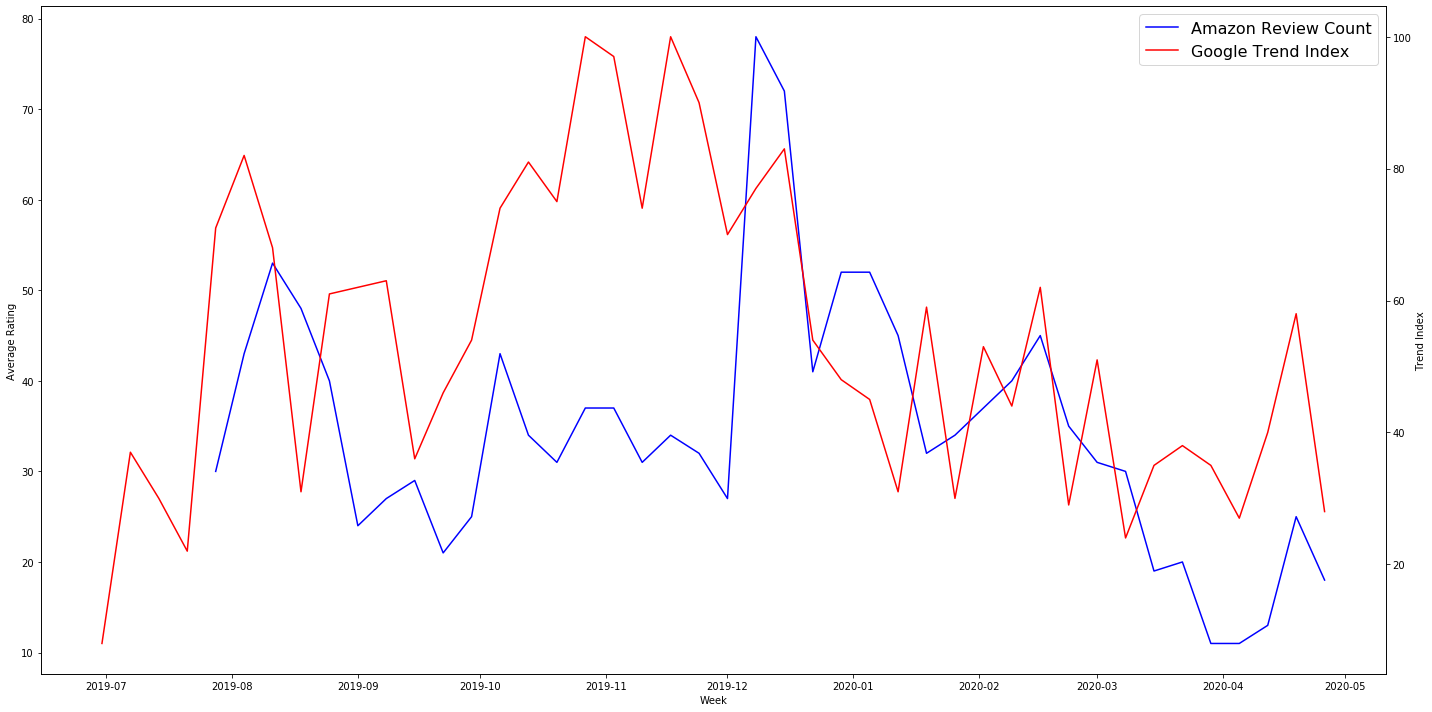

In [272]:
visualize_review_google_trend(df_wf)

(9, 0.6124826211899664)


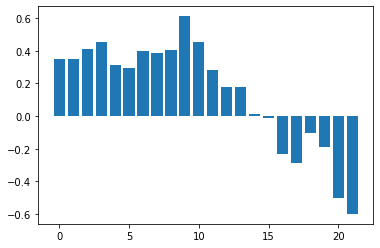

In [273]:
visualize_correlation(df_wf)